<a href="https://colab.research.google.com/github/Vi-Ku/NiFi/blob/master/NIFI_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#code for thread

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

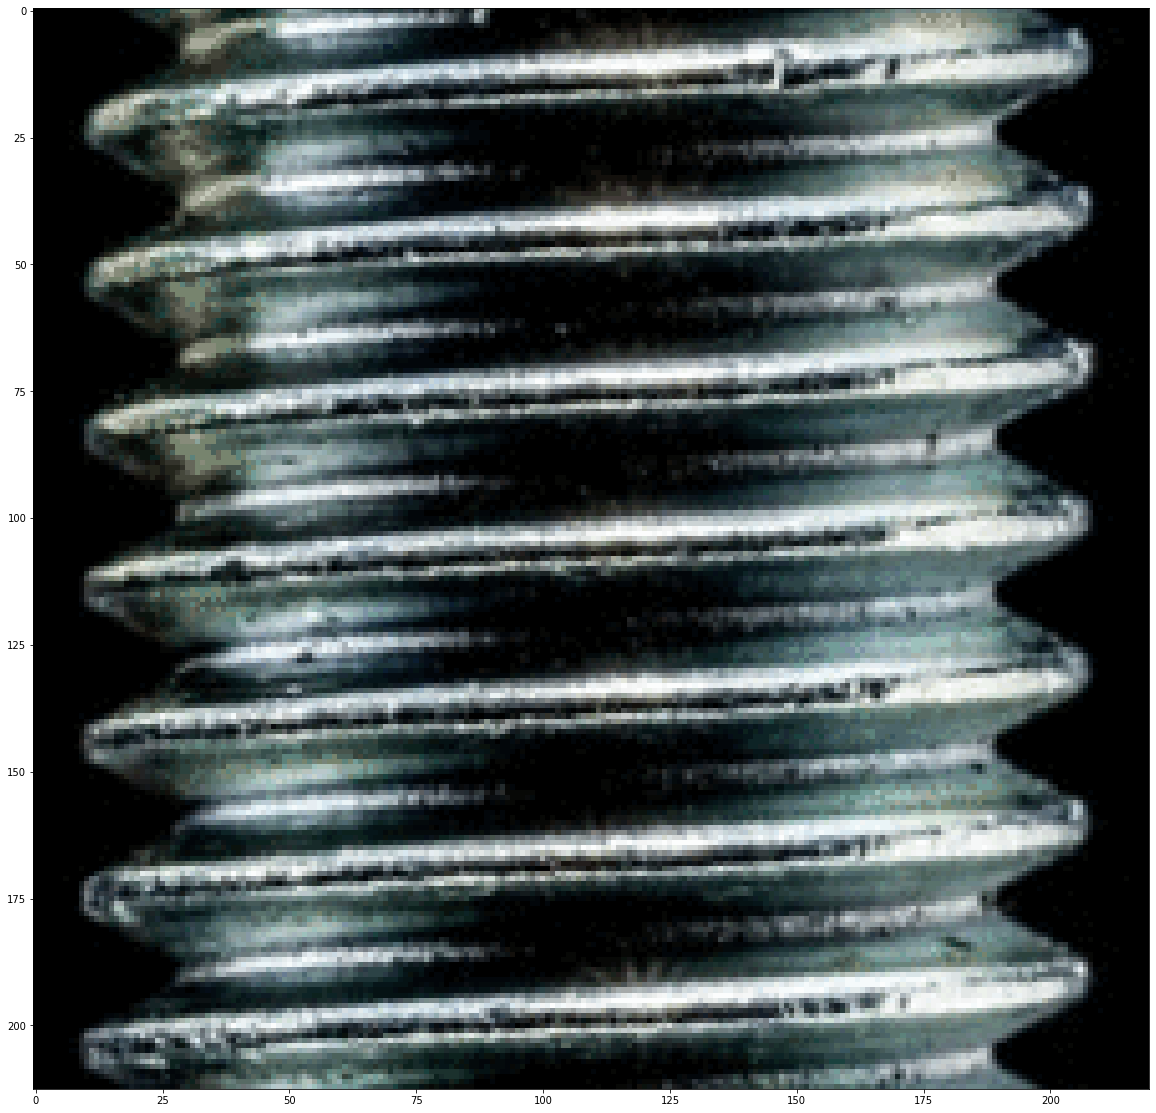

In [5]:
image = cv2.imread("/content/rsz_1imageedit_1_4966854690.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((5,5), np.uint8)
binary = cv2.erode(binary, kernel, iterations=1) 
binary= cv2.dilate(binary, kernel, iterations=2) 
# show it
plt.figure(figsize=(20,20))
plt.imshow(image, cmap="gray",)
plt.show()

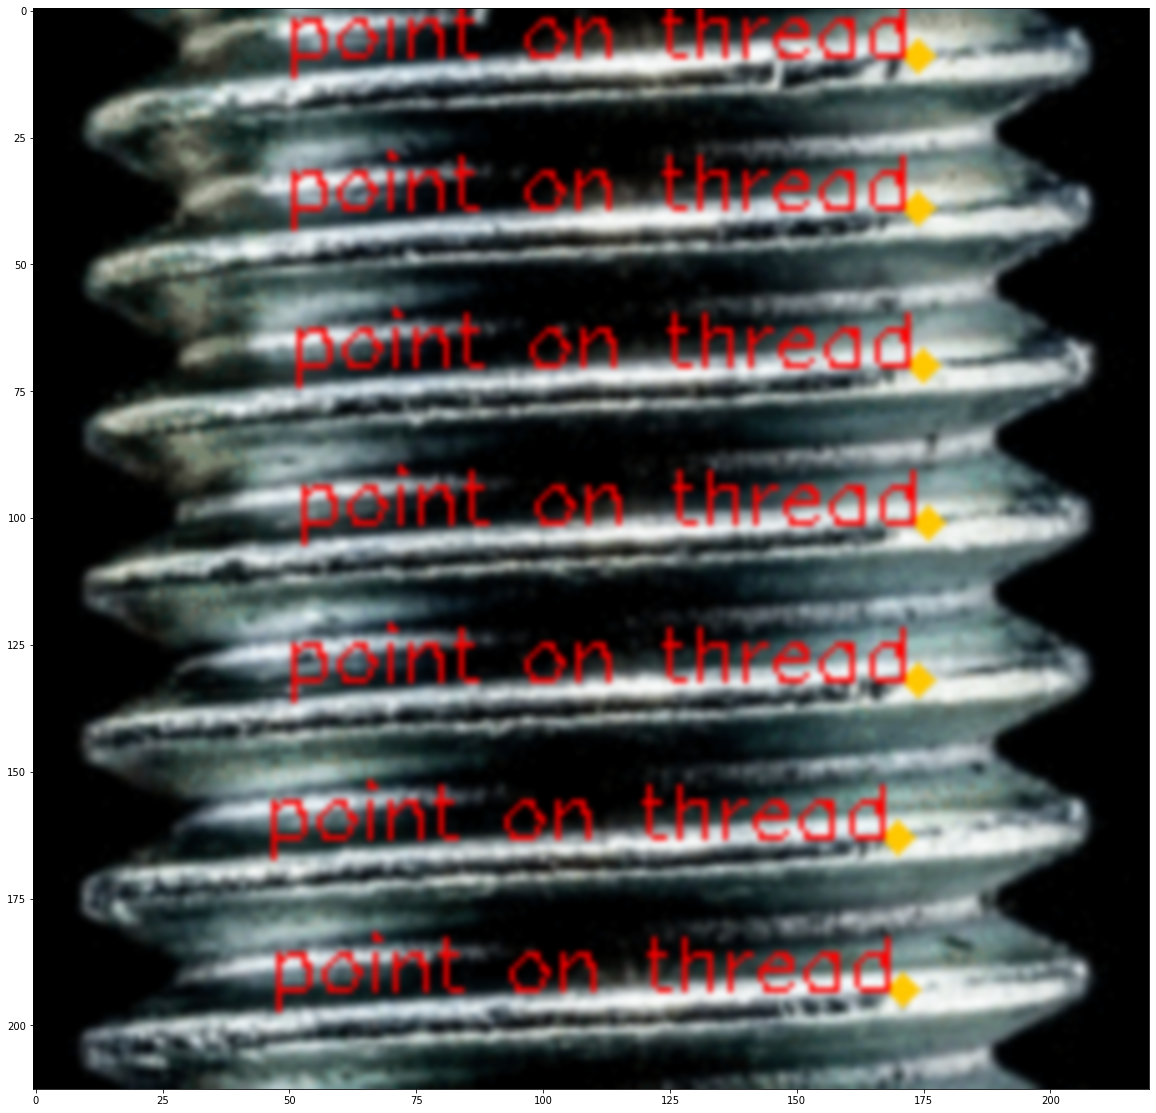

[171, 170, 174, 176, 175, 174, 174] [193, 163, 132, 101, 70, 39, 9]
30
31
31
31
31
30
HERE GIVEN RESOLUTION IS 2048*1365

her the exact thread diameter is based on camera resolution/ inch, which has to be calucalted and multiplied by number of pixel as shown above


In [7]:
import imutils
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
#image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
#h,contours = imutils.grab_contours(contours)
x=[]
y=[]
for c in contours:
  cv2.contourArea(c)
  area = cv2.contourArea(c)
  if area<90:
	# compute the center of the contour
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    x.append(cX)
    y.append(cY)
    # draw the contour and center of the shape on the image
    #cv2.drawContours(image, [c], -1, (255, 255, 0), 2)
    cv2.circle(image, (cX, cY), 1, (255, 200, 0), 3)
    cv2.putText(image, "point on thread", (cX -125, cY ),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
plt.figure(figsize=(20,20))
plt.imshow(image,interpolation='bicubic')
plt.show()
print(x,y)
y.sort()
x.sort()
for i in range(6):
  print(y[1+i]-y[i])
print("HERE GIVEN RESOLUTION IS 2048*1365\n")
print("Here the exact thread diameter is based on camera resolution/ inch, which has to be calucalted and multiplied by number of pixel as shown above")


#CODE ENDS